# 听说OpenCV也能用来抠图-1Z实验室

## 概要

本节课，阿凯带大家通过罩层对彩图进行二值化操作，最终实现抠图与图像拼接的功能。


## 图像二值化

In [1]:
import cv2

In [3]:
# 载入原图
img = cv2.imread('cat.jpeg')

In [4]:
from matplotlib import pyplot as plt

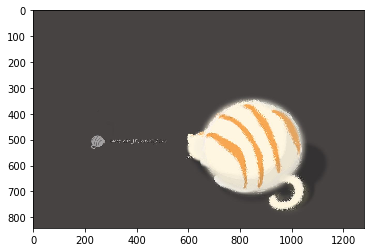

In [5]:
# 展示图像
plt.imshow(img[:, :, ::-1])

In [6]:
# 图像二值化
img_bin = cv2.inRange(img, lowerb=(9, 16, 84), upperb=(255, 251, 255))

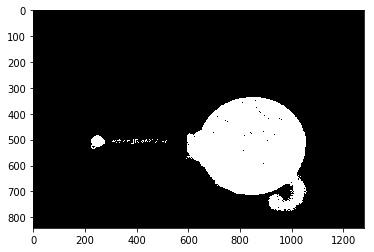

In [7]:
plt.imshow(img_bin, cmap='gray')

## 数学形态学处理

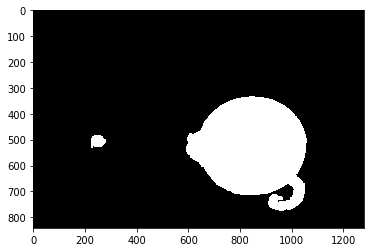

In [8]:
# 数学形态学预处理
import numpy as np
kernel = np.ones((5,5), np.uint8)
img_bin = cv2.erode(img_bin, kernel, iterations=1)
img_bin = cv2.dilate(img_bin, kernel, iterations=2)
plt.imshow(img_bin, cmap='gray')

## 筛选连通域

In [13]:
# 过滤掉小的contours
# 获取边缘信息
_, contours, hierarchy = cv2.findContours(image=img_bin,mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)


def contours_area(cnt):
    # 计算countour的面积
    (x, y, w, h) = cv2.boundingRect(cnt)
    return w * h

# 获取面积最大的contour
max_cnt = max(contours, key=lambda cnt: contours_area(cnt))

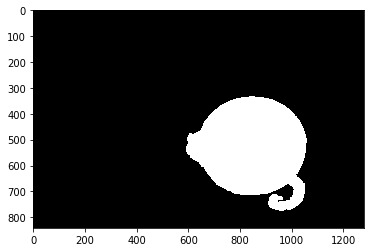

In [15]:
# 创建空白画布
mask = np.zeros_like(img_bin)
# 获取面积最大的 contours
mask = cv2.drawContours(mask,[max_cnt],0,255,-1)
# 打印罩层
plt.imshow(mask, cmap='gray')

## 抠图-带罩层的二值化与操作

img跟它本身进行或/与操作（其实他们的结果是一样的) 在罩层区域（MASK）内进行。
罩层区域为0, 黑色。 

二值化操作就是 如果两个img的该点的像素点都不为零则保留原来的取值，否则就是黑色。

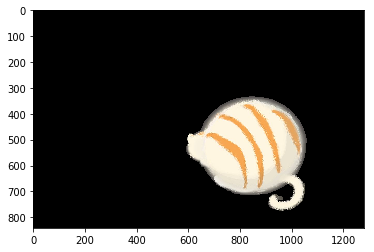

In [50]:
# 使用罩层对原来的图像进行抠图
sub_img = cv2.bitwise_or(img,img,mask=mask)
# sub_img = cv2.bitwise_and(img,img,mask=mask)

plt.imshow(sub_img[:,:,::-1])

哇， 大白猫就抠出来了

## 换个背景颜色

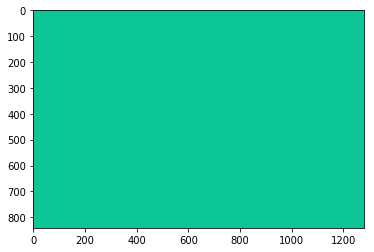

In [34]:
# 给大白猫换个背景
background = np.zeros_like(img)
background[:,:,:]  = (150, 198, 12)
plt.imshow(background[:,:,::-1])

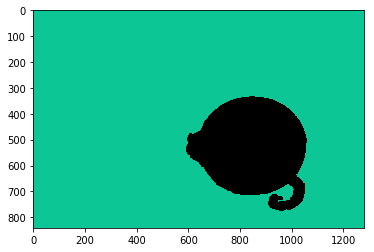

In [51]:
# 获取新的背景
new_background = cv2.bitwise_or(background, background, mask=cv2.bitwise_not(mask))
plt.imshow(new_background[:,:,::-1])

## 图片合并 cv2.add


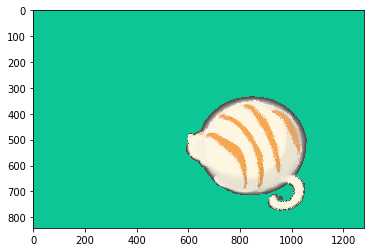

In [46]:
new_img = cv2.add(new_background, sub_img)
plt.imshow(new_img[:,:,::-1])

## 高斯模糊

拼接感太强，做一下高斯模糊

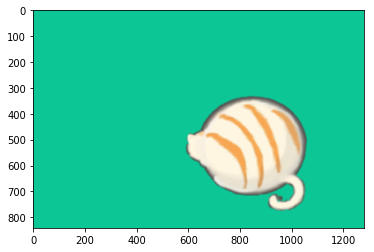

In [61]:
# 用5*5的kernel进行高斯模糊
new_img_blur = cv2.GaussianBlur(new_img, (9,9), 5)
plt.imshow(new_img_blur[:,:,::-1])